# Predicting the sale prices of Bulldozers using Machine Learning

## 1. Problem Definition

> How well can we predict the future sale price of bulldozers, given its characteristics and previous examples of how much similar bulldozers have been sold for?

## 2. Data

The data is downloaded from the Kaggle Blue Book for Bulldozers (https://www.kaggle.com/c/bluebook-for-bulldozers/data).

The data is split into three parts:

* `Train.csv` is the training set, which contains data through the end of 2011.
* `Valid.csv` is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* `Test.csv` is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

In [1]:
# Rather than downloading it directly from Kaggle website, we will do it the Pythonic way.

# Download the data from Kaggle
# !kaggle competitions download -c bluebook-for-bulldozers

In [2]:
# # Extract the zip folder
# import zipfile

# with zipfile.ZipFile("bluebook-for-bulldozers.zip") as f:
#     f.extractall(path="./data/")

## 3. Evaluation

The evaluation metric is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

**Note:** The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimizes RMSLE.

## 4. Features

Kaggle provides a Data Dictionary detailing all of the features of the dataset.

In [3]:
import pandas as pd

data_dict_df = pd.read_excel("./data/Data Dictionary.xlsx")

data_dict_df

c:\Users\ahmad\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,Variable,Description,Unnamed: 2
0,SalesID,unique identifier of a particular sale of a ...,NaN
1,MachineID,identifier for a particular machine; machin...,NaN
2,ModelID,identifier for a unique machine model (i.e. ...,NaN
3,datasource,source of the sale record; some sources are...,NaN
4,auctioneerID,"identifier of a particular auctioneer, i.e. ...",NaN
5,YearMade,year of manufacturer of the Machine,NaN
6,MachineHoursCurrentMeter,current usage of the machine in hours at tim...,NaN
7,UsageBand,"value (low, medium, high) calculated compari...",NaN
8,Saledate,time of sale,NaN
9,Saleprice,cost of sale in USD,NaN


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [5]:
# import training and validation data sets
df = pd.read_csv("./data/TrainAndValid.csv", low_memory=False)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [7]:
# Let's inspect our data set for null values
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [8]:
# Check for duplicates
df.duplicated().sum()

0

In [9]:
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,392562.000000,412698.000000,1.475040e+05
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.585268,1899.049637,3.522988e+03
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,9.646749,17.158409,292.190243,2.716993e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,3.209000e+03
max,6.333349e+06,142000.000000,2.486330e+06,37198.000000,173.000000,99.000000,2014.000000,2.483300e+06


<Axes: ylabel='Frequency'>

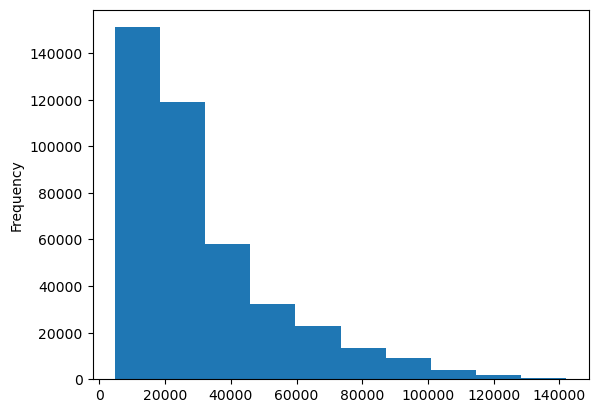

In [10]:
df.SalePrice.plot.hist()

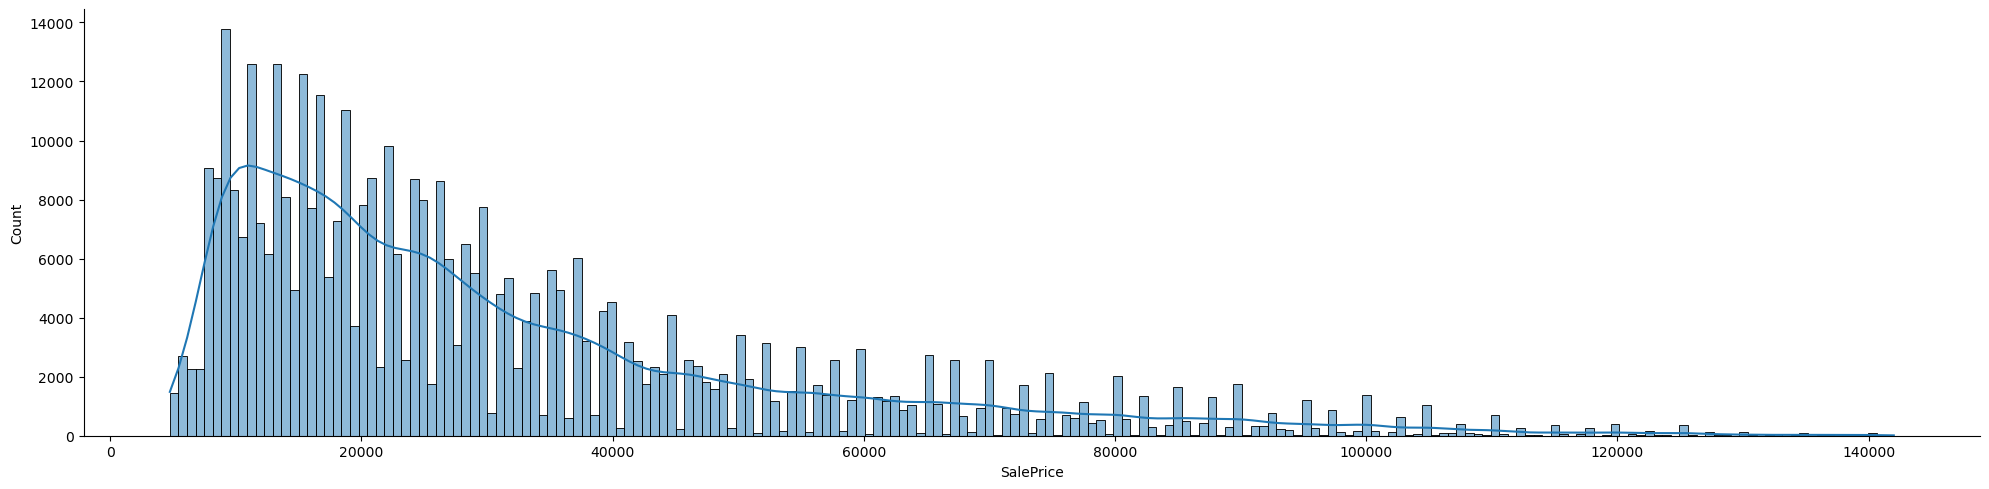

In [11]:
sns.displot(df.SalePrice, aspect=4, kde=True);

In [12]:
df.saledate.dtype

dtype('O')

### Convert saledate to DateTime

In [13]:
df.saledate = pd.to_datetime(df.saledate)

In [14]:
df.saledate.dtype

dtype('<M8[ns]')

In [15]:
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

In [16]:
# Another way is to import the data again but to parse dates
df = pd.read_csv("./data/TrainAndValid.csv",
                 low_memory=False,
                 parse_dates=["saledate"])

In [17]:
df.saledate.dtype

dtype('<M8[ns]')

In [18]:
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

In [19]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


### Sort DataFrame by saledate

When working with time series data, it's a good idea to sort it by date.

In [20]:
# Sort DataFrame in date order
df.sort_values(by=["saledate"], inplace=True, ascending=True)

In [21]:
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of the original DataFrame

We make a copy of the original dataframe so when we manipulate the copy, we still have our original data in case we need to revert back to it again.

In [22]:
# Make a copy of the df
df_temp = df.copy()

### Add datetime parameters for `saledate` column

In [23]:
df_temp["saleYear"] = df_temp.saledate.dt.year
df_temp["saleMonth"] = df_temp.saledate.dt.month
df_temp["saleDay"] = df_temp.saledate.dt.day
df_temp["saleDayOfWeek"] = df_temp.saledate.dt.dayofweek
df_temp["saleDayOfYear"] = df_temp.saledate.dt.dayofyear

In [24]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [25]:
# Since we have added the new columns, we can drop the saledate column
df_temp.drop("saledate", axis=1, inplace=True)

## 5. Modelling

In [26]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

X = df_temp.drop("SalePrice", axis=1)
y = df_temp.SalePrice

# model.fit(X, y) # we get a ValueError: could not convert string to float: "Low"

### Convert string to categories

One way we can turn all of our data into numbers is by converting them into pandas categories.

In [27]:
pd.api.types.is_string_dtype(df_temp["UsageBand"])

False

In [28]:
df_temp.dtypes

SalesID                       int64
SalePrice                   float64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                float64
YearMade                      int64
MachineHoursCurrentMeter    float64
UsageBand                    object
fiModelDesc                  object
fiBaseModel                  object
fiSecondaryDesc              object
fiModelSeries                object
fiModelDescriptor            object
ProductSize                  object
fiProductClassDesc           object
state                        object
ProductGroup                 object
ProductGroupDesc             object
Drive_System                 object
Enclosure                    object
Forks                        object
Pad_Type                     object
Ride_Control                 object
Stick                        object
Transmission                 object
Turbocharged                 object
Blade_Extension             

In [29]:
# Find the columns which contain strings
for label, content in df_temp.items():
    if pd.api.types.is_object_dtype(content):
    # if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [30]:
# This will turn all of the string value into category values
for label, content in df_temp.items():
    if pd.api.types.is_object_dtype(content):
        df_temp[label] = content.astype("category").cat.as_ordered()

In [31]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [32]:
df_temp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [33]:
df_temp.state.value_counts

<bound method IndexOpsMixin.value_counts of 205615         Texas
274835       Florida
141296       Florida
212552       Florida
62755        Florida
             ...    
410879    California
412476    California
411927    California
407124    California
409203    California
Name: state, Length: 412698, dtype: category
Categories (53, object): ['Alabama' < 'Alaska' < 'Arizona' < 'Arkansas' ... 'Washington DC' < 'West Virginia' < 'Wisconsin' < 'Wyoming']>

In [34]:
# access the categories numeric values 
df_temp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

Pandas categories gives us access to all of our data in the form of numbers. However, we still have some missing data.

In [35]:
# Check for missing data (in percentage)
df_temp.isnull().sum()/len(df_temp)*100

SalesID                      0.000000
SalePrice                    0.000000
MachineID                    0.000000
ModelID                      0.000000
datasource                   0.000000
auctioneerID                 4.879113
YearMade                     0.000000
MachineHoursCurrentMeter    64.258610
UsageBand                   82.149174
fiModelDesc                  0.000000
fiBaseModel                  0.000000
fiSecondaryDesc             34.099269
fiModelSeries               85.784520
fiModelDescriptor           81.871490
ProductSize                 52.485110
fiProductClassDesc           0.000000
state                        0.000000
ProductGroup                 0.000000
ProductGroupDesc             0.000000
Drive_System                74.051970
Enclosure                    0.080931
Forks                       52.092087
Pad_Type                    80.349796
Ride_Control                62.992794
Stick                       80.349796
Transmission                54.444412
Turbocharged

### Save our preprocessed data

In [36]:
# Export our current dataframe so we can jump straight back without running the whole notebook from the start
df_temp.to_csv("./data/TrainTemp.csv", index=False)

In [37]:
# Import the preprocessed data (when we want to return back)
df_temp = pd.read_csv("./data/TrainTemp.csv", low_memory=False)

df_temp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


### Fill missing values

In [38]:
df_temp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

### Fill missing numerical values first

In [39]:
# How do we check what columns are numeric and not numeric?
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [40]:
df_temp.ModelID

0          8434
1         10150
2          4139
3          8591
4          4089
          ...  
412693     5266
412694    19330
412695    17244
412696     3357
412697     4701
Name: ModelID, Length: 412698, dtype: int64

In [41]:
# Check for which numeric columns have null values
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [42]:
# Fill the rows in the columns that have null values with median values
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing
            df_temp[label+"is_missing"] = pd.isnull(content)
            # Fill missing numeric values with media
            df_temp[label] = content.fillna(content.median())

### Why median? Why not mean?

In [43]:
# Demonstrate how median is more "robust" than mean
hundreds = np.full((1000), 100)
hundreds_billion = np.append(hundreds, 1000000000)
np.mean(hundreds), np.mean(hundreds_billion), np.median(hundreds), np.median(hundreds_billion)

(100.0, 999100.8991008991, 100.0, 100.0)

We can see from above that median is more robust when dealing with outliers.

In [44]:
# Check if there's any null numeric values
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [45]:
# Check to see how many examples were missing
df_temp.auctioneerIDis_missing.value_counts()

auctioneerIDis_missing
False    392562
True      20136
Name: count, dtype: int64

In [46]:
df_temp.MachineHoursCurrentMeteris_missing.value_counts()

MachineHoursCurrentMeteris_missing
True     265194
False    147504
Name: count, dtype: int64

In [47]:
# Check again how many missing values in our dataframe
df_temp.isna().sum()

SalesID                                    0
SalePrice                                  0
MachineID                                  0
ModelID                                    0
datasource                                 0
auctioneerID                               0
YearMade                                   0
MachineHoursCurrentMeter                   0
UsageBand                             339028
fiModelDesc                                0
fiBaseModel                                0
fiSecondaryDesc                       140727
fiModelSeries                         354031
fiModelDescriptor                     337882
ProductSize                           216605
fiProductClassDesc                         0
state                                      0
ProductGroup                               0
ProductGroupDesc                           0
Drive_System                          305611
Enclosure                                334
Forks                                 214983
Pad_Type  

### Filling and turning categorical variables into numbers

In [48]:
# Check for columns which aren't numeric
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


When we turn a string column into categories, we had access to an attribute called `codes` which gave us numerical values for all of the variables in that column

In [49]:
pd.Categorical(df_temp.state).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [50]:
# Turn categorical variables into numbers and fill missing
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Check missing and add a binary column to indicate whether sample has missing value
        df_temp[label+"_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        df_temp[label] = pd.Categorical(content).codes + 1

In [51]:
# Why do we add + 1? Let's take a look
pd.Categorical(df_temp.state).codes + 1

array([44,  9,  9, ...,  5,  5,  5], dtype=int8)

In [52]:
pd.Categorical(df_temp.state).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

The way Pandas Categories (Categorical attribute) work, it automatically assign a missing value with code of `- 1` but we don't want that and instead we want a `0`

Example below:

In [53]:
pd.Categorical(df_temp["UsageBand"]).codes

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [54]:
# When we add + 1
pd.Categorical(df_temp["UsageBand"]).codes + 1

array([1, 1, 1, ..., 1, 1, 1], dtype=int8)

In [55]:
df_temp.isnull().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [56]:
df_temp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [57]:
df_temp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [58]:
# Export our current dataframe so we can jump straight back without running the whole notebook from the start
df_temp.to_csv("./data/TrainTemp.csv", index=False)

In [59]:
# Import the preprocessed data (when we want to return back)
df_temp = pd.read_csv("./data/TrainTemp.csv", low_memory=False)

df_temp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


### Now that our data has no missing values and has turned into numerical values, we should be able to build a machine learning model

In [60]:
%%time
# Instantiate model
model = RandomForestRegressor(n_jobs=-1,
                            random_state=42)

X = df_temp.drop("SalePrice",axis=1)
y = df_temp["SalePrice"]

# Fit the model
model.fit(X, y)

CPU times: total: 27min 38s
Wall time: 2min 25s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [61]:
# Score the model
model.score(X, y)

0.9875468079970562

**Question:** Why isn't the metric above reliable eventhough the score is 0.987?

**Answer:** We fitted and evaluated on the same set of data (training data)

### Splitting data into train/validation sets

In [62]:
df_temp.saleYear

0         1989
1         1989
2         1989
3         1989
4         1989
          ... 
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: saleYear, Length: 412698, dtype: int64

In [63]:
df_temp.saleYear.value_counts()

saleYear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

Let's make our own training and validation data sets

Training data: saleYear < 2012
Validation data set: saleYear == 2012

In [64]:
# Split data into training and validation
df_val = df_temp[df_temp.saleYear == 2012]
df_train = df_temp[df_temp.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [65]:
# Split data into X & y
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [66]:
y_train

0          9500.0
1         14000.0
2         50000.0
3         16000.0
4         22000.0
           ...   
401120    29000.0
401121    11000.0
401122    11000.0
401123    18000.0
401124    13500.0
Name: SalePrice, Length: 401125, dtype: float64

In [67]:
y_valid

401125    46173.2
401126    66000.0
401127    26800.0
401128    42100.0
401129    62100.0
           ...   
412693    16000.0
412694     6000.0
412695    16000.0
412696    55000.0
412697    34000.0
Name: SalePrice, Length: 11573, dtype: float64

### Building an evaluation function

In [68]:
# Create an evaluation function (the competition uses RMSLE)

from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """ 
    Calculates Root Mean Squared Log Error between predictions and true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))


# Create function to evaluate model on a few different levels

def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {
        "Training MAE": mean_absolute_error(y_train, train_preds),
        "Valid MAE": mean_absolute_error(y_valid, val_preds),
        "Training RMSLE": rmsle(y_train, train_preds),
        "Valid RMSLE": rmsle(y_valid, val_preds),
        "Training R^2": r2_score(y_train, train_preds),
        "Valid R^2": r2_score(y_valid, val_preds)
    }
    return scores

## Testing our model (to tune the hyperparameters)

In [ ]:
# # This takes too long

# %%time
# model = RandomForestRegressor(n_jobs=-1,
#                               random_state=42)

# model.fit(X_train, y_train)

In [69]:
# Change max samples value
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                              max_samples=10000)

In [70]:
%%time

# Cutting down on the max number of samples each estimator can see improves training time
model.fit(X_train, y_train)

CPU times: total: 55.7 s
Wall time: 3.75 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [71]:
show_scores(model)

{'Training MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003,
 'Training R^2': 0.8606658995199189,
 'Valid R^2': 0.8320374995090507}

### Hyperparameter tuning with RandomizedSearchCV

In [89]:
%%time

from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters

rf_grid = {
    "n_estimators": np.arange(10, 100, 10),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2),
    "max_features": [0.5, 1, "sqrt", "auto"],
    "max_samples": [10000]
}

# Instantiate RandomizedSearchCV model
rs_model_2_iter = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, 
                                                    random_state=42),
                                                    param_distributions=rf_grid,
                                                    n_iter=2,
                                                    cv=5,
                                                    verbose=True)

rs_model_2_iter.fit(X_train, y_train)                            

Fitting 5 folds for each of 2 candidates, totalling 10 fits


c:\Users\ahmad\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ahmad\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ahmad\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\ahmad\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\ahmad\anaconda3\Lib\site-packages\sk

CPU times: total: 2 s
Wall time: 8.83 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [90]:
# Find the best model hyperparameters
rs_model_2_iter.best_params_

{'n_estimators': 50,
 'min_samples_split': 8,
 'min_samples_leaf': 15,
 'max_samples': 10000,
 'max_features': 'sqrt',
 'max_depth': 10}

In [91]:
# Evaluate the RandomizedSearchCV model
show_scores(rs_model_2_iter)

{'Training MAE': 9247.406401806144,
 'Valid MAE': 10766.678292286504,
 'Training RMSLE': 0.4046614629122586,
 'Valid RMSLE': 0.4261462741255542,
 'Training R^2': 0.6620852636697315,
 'Valid R^2': 0.6681542894019415}

### Train a model with the best hyperparameters

**Note**: These were found after 100 iterations of `RandomizedSearchCV`.

In [92]:
%%time

from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters

rf_grid = {
    "n_estimators": np.arange(10, 100, 10),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2),
    "max_features": [0.5, 1, "sqrt", "auto"],
    "max_samples": [10000]
}

# Instantiate RandomizedSearchCV model
rs_model_100_iter = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, 
                                                    random_state=42),
                                                    param_distributions=rf_grid,
                                                    n_iter=100,
                                                    cv=5,
                                                    verbose=True)

rs_model_100_iter.fit(X_train, y_train)                            

Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\ahmad\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
115 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
115 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ahmad\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ahmad\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\ahmad\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\ahmad\anaconda3\Lib\site-packag

CPU times: total: 1min 37s
Wall time: 6min 47s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [93]:
# Find the best model hyperparameters
rs_model_100_iter.best_params_

{'n_estimators': 50,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [94]:
# Evaluate the RandomizedSearchCV model
show_scores(rs_model_100_iter)

{'Training MAE': 6006.788977997804,
 'Valid MAE': 7402.5831576058135,
 'Training RMSLE': 0.27407906468678506,
 'Valid RMSLE': 0.3039732579512683,
 'Training R^2': 0.8400831890019149,
 'Valid R^2': 0.8249305461662221}

In [96]:
# Hyperparameters from Udemy video

# Most ideal hyperparameters
ideal_model = RandomForestRegressor(random_state=42,
                                    n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None)

# Fit the ideal model
ideal_model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [97]:
# Scores for ideal model (trained on all the data)
show_scores(ideal_model)

{'Training MAE': 2953.8161137163484,
 'Valid MAE': 5951.247761444453,
 'Training RMSLE': 0.14469006962371858,
 'Valid RMSLE': 0.24524163989538328,
 'Training R^2': 0.9588145522577225,
 'Valid R^2': 0.8818019502450094}

In [98]:
# Scores on rs_model (only trained on ~10,000 examples)
show_scores(rs_model_2_iter)

{'Training MAE': 9247.406401806144,
 'Valid MAE': 10766.678292286506,
 'Training RMSLE': 0.4046614629122586,
 'Valid RMSLE': 0.4261462741255542,
 'Training R^2': 0.6620852636697315,
 'Valid R^2': 0.6681542894019414}

In [99]:
# Scores on rs_model (only trained on ~10,000 examples)
show_scores(rs_model_100_iter)

{'Training MAE': 6006.788977997806,
 'Valid MAE': 7402.5831576058135,
 'Training RMSLE': 0.27407906468678506,
 'Valid RMSLE': 0.3039732579512683,
 'Training R^2': 0.8400831890019149,
 'Valid R^2': 0.8249305461662221}

## Make predictions on Test data

In [113]:
# Import test data
df_test = pd.read_csv("./data/Test.csv", 
                      low_memory=False, 
                      parse_dates=["saledate"])

df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [114]:
# Make predictions on the test data set
X = df_test
# There is no y since this is what we are trying to predict

# test_preds = ideal_model.predict(df_test) # error because the test data is not in the same format as the training data

In [115]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

From the above, we need to preprocess the test data set to get the same format as our training dataset

## Preprocessing the test data set

In [116]:
def preprocess_data(df):
    """ 
    Performs transformations on df and returns transformed df
    """

    # Sort DataFrame in date order
    df.sort_values(by=["saledate"], inplace=True, ascending=True)

    # Add datetime parameters for `saledate` column
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear
    
    # Since we have added the new columns, we can drop the saledate column
    df.drop("saledate", axis=1, inplace=True)

    for label, content in df.items():
        # This will turn all of the string value into category values
        if pd.api.types.is_object_dtype(content):
            df[label] = content.astype("category").cat.as_ordered()

        # Fill the rows in the columns that have null values with median values
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing
                df[label+"is_missing"] = pd.isnull(content)
                # Fill missing numeric values with media
                df[label] = content.fillna(content.median())

        # Turn categorical variables into numbers and fill missing
        if not pd.api.types.is_numeric_dtype(content):
            # Check missing and add a binary column to indicate whether sample has missing value
            df[label+"_is_missing"] = pd.isnull(content)
            # Turn categories into numbers and add +1
            df[label] = pd.Categorical(content).codes + 1

    return df

In [117]:
# Process the test data
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
1408,4317459,2295526,8132,172,1,1998,4359.0,3,397,148,...,True,True,True,True,True,True,True,True,True,True
1023,4249784,1745722,3178,172,1,1995,4489.0,2,509,180,...,True,True,True,True,True,True,True,True,True,True
1728,4392603,2283116,18111,172,1,2004,2126.0,2,906,320,...,True,True,True,True,True,True,True,True,True,True
1167,4274831,2288988,3783,172,1,2001,9115.0,3,824,290,...,True,True,True,True,True,True,True,True,False,False
1594,4362801,2300591,16490,172,1,2006,885.0,2,1513,610,...,False,False,False,False,False,True,True,True,True,True


In [119]:
# Make predictions on updated test data
# test_preds = ideal_model.predict(df_test) # error because auctioneerIDis_missing column is missing

In [120]:
# We can find how the columns differ using sets
set(X_train.columns) - set(df_test.columns)

{'auctioneerIDis_missing'}

In [123]:
# In our test data, the auctioneerID is already filled so we need to manually adjust df_test to have auctioneerIDis_missing column so it matches
df_test["auctioneerIDis_missing"] = False
df_test = df_test.reindex(columns=list(X_train.columns))
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
1408,4317459,2295526,8132,172,1,1998,4359.0,3,397,148,...,True,True,True,True,True,True,True,True,True,True
1023,4249784,1745722,3178,172,1,1995,4489.0,2,509,180,...,True,True,True,True,True,True,True,True,True,True
1728,4392603,2283116,18111,172,1,2004,2126.0,2,906,320,...,True,True,True,True,True,True,True,True,True,True
1167,4274831,2288988,3783,172,1,2001,9115.0,3,824,290,...,True,True,True,True,True,True,True,True,False,False
1594,4362801,2300591,16490,172,1,2006,885.0,2,1513,610,...,False,False,False,False,False,True,True,True,True,True


Finally, we can make predictions!

In [124]:
# Make predictions on the test data
test_preds = ideal_model.predict(df_test)

In [125]:
test_preds

array([10079.43370132, 17364.50538248, 23114.71792   , ...,
       43906.57014516, 46527.14818226, 40430.09359041])

In [126]:
# Format predictions into the same format that is stated in the Kaggle competition rules
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
1408,4317459,10079.433701
1023,4249784,17364.505382
1728,4392603,23114.717920
1167,4274831,29436.635793
1594,4362801,12462.938157
...,...,...
9941,6620191,8211.044337
9936,6620142,13041.317350
11620,6635116,43906.570145
9995,6621460,46527.148182


In [127]:
# Export prediction data to csv to submit to Kaggle (just as an example because now the competition is closed)
df_preds.to_csv("./data/test_predictions.csv", index=False)

### Feature Importance

Feature importance seeks to figure out which different attributes of the data were most important when it comes to predicting the **target variable** (SalesPrice).

In [128]:
# Find the feature importances of our ideal model
ideal_model.feature_importances_

array([3.39445533e-02, 1.81148281e-02, 4.09167072e-02, 1.70752171e-03,
       3.40797459e-03, 2.08200698e-01, 2.95067052e-03, 1.10113725e-03,
       4.16122668e-02, 4.71911805e-02, 6.23815431e-02, 4.67433955e-03,
       1.52524442e-02, 1.52517337e-01, 4.72224713e-02, 5.96817956e-03,
       1.29351899e-03, 2.78088439e-03, 2.37248769e-03, 6.17114453e-02,
       8.13525488e-04, 3.61873268e-05, 9.19098115e-04, 2.23170993e-04,
       1.28102678e-03, 2.06519636e-05, 2.01477316e-03, 6.63364759e-03,
       2.15274492e-03, 2.50178165e-03, 4.63902393e-03, 3.85873985e-03,
       2.76062667e-03, 1.00782454e-03, 2.47969268e-04, 6.04239818e-03,
       7.64997072e-04, 1.57100537e-02, 2.29716203e-03, 2.58372272e-03,
       8.07637426e-04, 9.18548690e-04, 1.35656446e-03, 5.81458569e-04,
       4.96716928e-04, 3.79552257e-04, 5.31712788e-04, 2.71823509e-03,
       8.34294376e-04, 3.12136841e-04, 2.14075157e-04, 7.42422919e-02,
       3.80158492e-03, 5.67641024e-03, 2.87154703e-03, 9.83349904e-03,
      

In [131]:
# Plotting feature importances
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
                        .sort_values("feature_importances", ascending=False)
                        .reset_index(drop=True))
    
    # Plot the dataframe
    fix, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importance")
    ax.invert_yaxis() # make the highest at the top

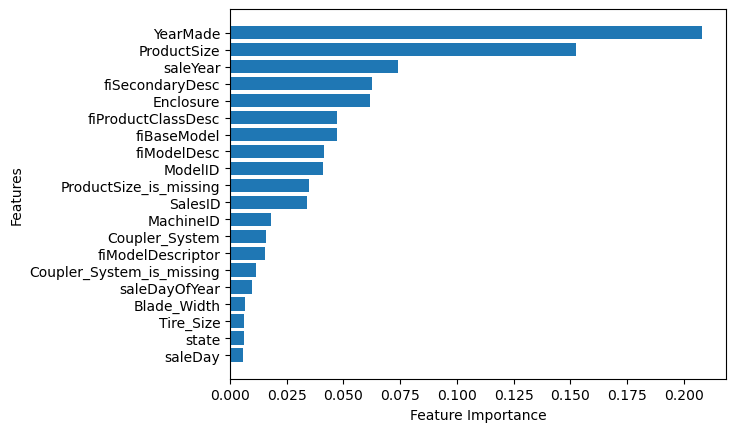

In [132]:
plot_features(X_train.columns, ideal_model.feature_importances_)